# Invariantin massan laskeminen

Tässä tehtävässä harjoitellaan laskemaan CMS-ilmaisimessa havaittujen hiukkasten __invariantti massa__. Invariantti massa on hiukkasfyysikoille tärkeä työkalu hiukkasten tunnistamisessa.

## Mikä on invariantti massa?

Kun hiukkaskiihdyttimessä törmäytetään hiukkasia, vapautuu valtava määrä energiaa, josta muodostuu uusia hiukkasia.
Jotkin törmäyksessä syntyneet hiukkaset, kuten esimerkiksi Higgsin hiukkane, ovat hyvin lyhytikäisiä ja hajoavat muiksi hiukkasiksi kauan ennenkuin ne päätyvät hiukkasilmaisimen detektoreihin. Hajoamistuotteina syntyneet hiukkasia voidaan kuitenkin havaita, ja näiden ominaisuuksia mittaamalla voimme päätellä, mistä hiukkasesta ne olivat alunperin peräisin (ja löytää todisteet esimerkiksi Higgsin olemassaololle). CMS:n kaltainen laite voi mitata hiukkasten liikemäärää ja energiaa, joiden avulla voidaan laskea _invariantti massa_. Se on matemaattinen arvo joka on "invariantti" mittausympäristölle, eli se voidaan laskea missä ja mille tahansa. Jos sen kuitenkin laskee tietystä hajoamisesta syntyneille "tytärhiukkasille" saadaan arvo joka on lähellä emohiukkasen massaa. Esimerkiksi Higgsin hiukkanen voi hajota neljäksi myoniksi, joiden liikemäärän ja energian voimme mitata hiukkasilmaisimella. Näiden neljän myonin liikemäärästä ja energiasta voimme laskea invariantin massan, joka vastaisi Higgsin hiukkasen massaa, sillä myonit ovat peräisin Higgsistä.

Invariantti massa siis säilyy hiukkasen hajotessa uusiksi hiukkasiksi. Tämän ominaisuuden ansiosta se on voittamaton työkalu kokeellisen hiukkasfysiikan tutkijoille. Hiukkasilmaisin, kuten CMS, havaitsee lähinnä stabiileja hiukkasia. Määrittääkseen sen, minkä hiukkasen hajoamisesta nuo stabiilit hiukkaset ovat peräisin, tutkijoiden tulee tarkastella suuria datamääriä. Voimme laskea invariantin massan usealle eri hajoamistapahtumalle ja piirtää kaikista laskemistamme invarianteista massoista histogrammi.
[Lisätietoa englanniksi](https://profmattstrassler.com/articles-and-posts/particle-physics-basics/mass-energy-matter-etc/mass-and-energy/)

Alla olevassa kuvassa on piirretty invariantin massan histogrammi sellaisista törmäyksistä, joissa hiukkasilmaisin on havainnut kaksi myonia. Piikit histogrammissa vastaavat emohiukkasta, josta myonit ovat peräisin.

<br>
 <img src="https://github.com/cms-opendata-education/cms-jupyter-materials-finnish/blob/master/Kuvat/inv_massa.PNG?raw=true"  align="left" width="600px" title="[Kuva 1]  Törmäyksestä syntyneiden kahden myonin invariantin massan jakauma vuosilta 2017 ja 2018. Jakaumasta erottaa selvästi niiden hiukkasten piikit jotka voivat hajota kahdeksi myoniksi.">
 <br>

****
## Datan hakeminen

Tarkoituksenamme on piirtää invariantin massan histogrammi CMS:n avoimesta datasta vuodelta 2011. Dataan on valikoitu tapahtumia joissa syntyy kaksi myonia [1]. Data löytyy CERN:n Open Data Portaalista [2], ja sitä voi käyttää `pd.read_csv()`-funktiossa nimellä `http://opendata.cern.ch/record/5206/files/Ymumu.csv`. Histogrammin piirtämistä varten meidän tulee kuitenkin laskea jokaiselle tapahtumalle invariantti massa. Alustetaan lasku hakemalla käyttämämme data sekä tarvittavat Python-paketit.

In [1]:
# Haetaan tarvittavat paketit

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# Lue data yllä olevasta tiedostopolusta ja tallenna se muuttujaan data

data=pd.read_csv("http://opendata.cern.ch/record/5206/files/Ymumu.csv")

In [7]:
# Katso datan muutama ensimmäinen rivi käyttäen head()-funktiota

data.head()

,Run,Event,type1,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,type2,E2,px2,py2,pz2,pt2,eta2,phi2,Q2
0,165617,75100943,G,6.2039,-4.2666,0.4565,-4.4793,4.2910,-0.9121,3.0350,-1,G,9.6690,7.2740,-2.8211,-5.7104,7.8019,-0.6786,-0.3700,1
1,165617,75587682,G,19.2892,-4.2121,-0.6516,18.8121,4.2622,2.1905,-2.9881,-1,G,9.8244,4.3439,-0.4735,8.7985,4.3697,1.4497,-0.1086,1
2,165617,75167029,G,9.7583,2.3903,-3.7824,8.6715,4.4744,1.4156,-1.0072,-1,G,13.5684,-3.3975,5.1910,12.0665,6.2039,1.4187,2.1503,1
3,165617,75281957,G,9.6365,1.6516,-5.4313,7.7862,5.6769,1.1213,-1.2756,1,G,7.0263,-1.6449,4.4418,5.1887,4.7366,0.9473,1.9255,-1
4,165617,75393376,G,6.0112,3.3614,2.8883,4.0598,4.4318,0.8208,0.7098,-1,G,7.7557,-5.0416,-3.0126,5.0642,5.8731,0.7806,-2.6030,1


****
## Invariantin massan laskeminen

Invariantti massa voidaan laskea havaittujen hiukkasten energioiden ja liikemäärien avulla. Kahden hiukkasen tapauksessa invariantti massa on:

$$ M = \sqrt{(E_1 + E_2)^2 - \|\textbf{p}_1 + \textbf{p}_2 \| ^2},$$

missä $\|\textbf{p}_1 + \textbf{p}_2 \| = (p_{x1}+p_{x2})^2+(p_{y1}+p_{y2})^2+(p_{z1}+p_{z2})^2$.

Laskussa voidaan käyttää apuna *numpy*-pakettia, jonka nimesimme yllä *np*:ksi. Numpyn avulla voimme mm. suorittaa matemaattisia komentoja, joista neliöjuurta (*sqrt*) tarvitsemme invariantin massan laskemisessa.

Esimerkki neliöjuuren laskemisesta:

In [8]:
np.sqrt(4)

2.0

Nyt voimme laskea invariatin massan arvot eri tapahtumille. Huomaa, että voimme laskea kaikkien rivien invariantit massat kerrallaan käyttämällä laskussa suureiden paikalla koko saraketta, esim. $E_1$ paikalla `data['E1']`.

Laske kaikille tapahtumille invariantti massa ja tallenna ne muuttujaan 'invariantti_massa'

In [8]:
# Laske invariantti massa ja tallenna muuttujaan invariantti_massa

invariantti_massa=np.sqrt((data["E1"]+data["E2"])**2-(data["px1"]+data["px2"])**2)

In [9]:
# Tulosta näytölle muuttujan invariantti_massa viisi ensimmäistä riviä (vinkki: käytä head()-funktiota)

invariantti_massa.head()

0    15.585394
1    29.113302
2    23.304945
3    16.662799
4    13.663984
dtype: float64

## Datan visualisointi

Nyt kun invariantit massat on laskettu, data pitää vielä visualisoida. Tee histogrammi invarianteista massoista, esim. 100 pylväällä. Mikä hiukkanen datassa on havaittavissa?

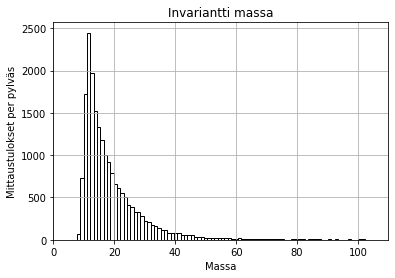

In [18]:
# Piirrä histogrammi invarianteista massoista


# piirretään histogrammi, ja valitaan alkuun pylväiden lukumääräksi 50
plt.hist(invariantti_massa, bins=100, range=(0,110), fill=False)

# Asetetaan x-akselin ja y-akselin otsikot
plt.xlabel('Massa')
plt.ylabel('Mittaustulokset per pylväs')

# Asetetaan kuvaajalle pääotsikko
plt.title('Invariantti massa')


# Asetetaan vielä x-akselin rajat samoiksi kuin histogrammin
plt.xlim((0,110))
plt.grid()
# Tämä komento poistaa ylimääräiset tulosteet ja näyttää ainoastaan kuvan, kun solu suoritetaan.
plt.show()